### PIMA Indian diabetes dataset 
#### Binary Classification problem

In [1]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import os
import sys
os.chdir("../data")

df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [15]:
cols_to_norm = [col for col in df.columns if not col in ["Class", "Group"]]

In [16]:
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [17]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [18]:
model_cols = []
for col in cols_to_norm:
    globals()[col] = tf.feature_column.numeric_column(col)
    model_cols.append(globals()[col])

In [19]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

In [13]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket("Group", hash_bucket_size=10)

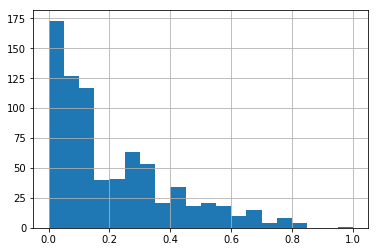

In [20]:
df["Age"].hist(bins=20)
plt.show()

In [21]:
# Convert age to categorical 
age = tf.feature_column.numeric_column("Age")
age_bucket = tf.feature_column.bucketized_column(age, 
                                                 boundaries = [20,30,40,50,60,70,80])

In [22]:
model_cols.extend(age_bucket)
model_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 (20, 30, 40, 50, 60, 70, 80)]

In [23]:
x_data = df.drop("Class", axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,C


In [24]:
labels = df["Class"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, 
                                                    test_size=0.3,
                                                    random_state=101)

In [27]:
input_func = tf.estimator.inputs.pandas_input_fn(x = x_train, 
                                                 y=y_train,
                                                 batch_size = 10, 
                                                 num_epochs=1000, 
                                                 shuffle=True)

In [28]:
model = tf.estimator.LinearClassifier(feature_columns=model_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\agupta\\AppData\\Local\\Temp\\tmp3k7qdkul', '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [29]:
model.train(input_func, steps=1000)

ValueError: Items of feature_columns must be a _FeatureColumn. Given (type <class 'tuple'>): (20, 30, 40, 50, 60, 70, 80).